In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [36]:
df = pd.read_feather("../../results/qpe_main.feather")

trafo = lambda x: "" if np.isnan(x) else f"_{int(x)}"

df["kind"] = df.qaoa + df.ancilla.transform(trafo)
df["kind"] = df.kind.replace("masked_cost", "qpe_inf")

df["scaling"] = (df.depth ** 2) / (df.p_opt * df.p_succ.fillna(1))

(513.6815531169424, 1000000.0)

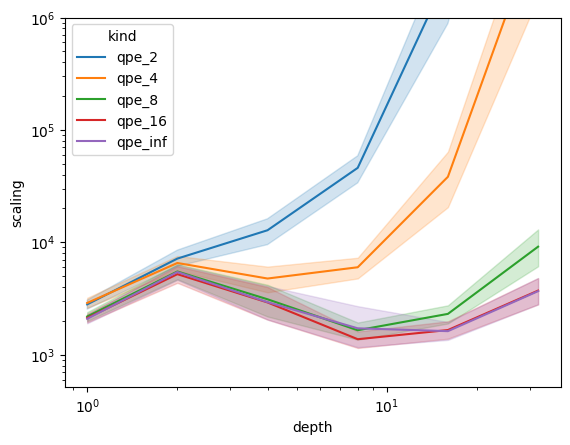

In [44]:
order = ["qpe_2", "qpe_4", "qpe_8", "qpe_16", "qpe_inf"]
sns.lineplot(df.query("n_qubits == 12"), x="depth", y="scaling", hue="kind", hue_order=order),# showfliers=False)
plt.yscale("log")
plt.xscale("log")
plt.ylim((None, 1e6))
# plt.axhline(1, color=sns.color_palette("tab10")[3])